# ♟️ Presentation and preprocessing of the Lichess Games Dataset ♟️

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [88]:
df = pd.read_csv("data/games.csv")
df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5


### Conversion of timestamps into understandable datetimes 

In [89]:
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms')
df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5


## Main statistics of the dataset

### Do we have some missing data?

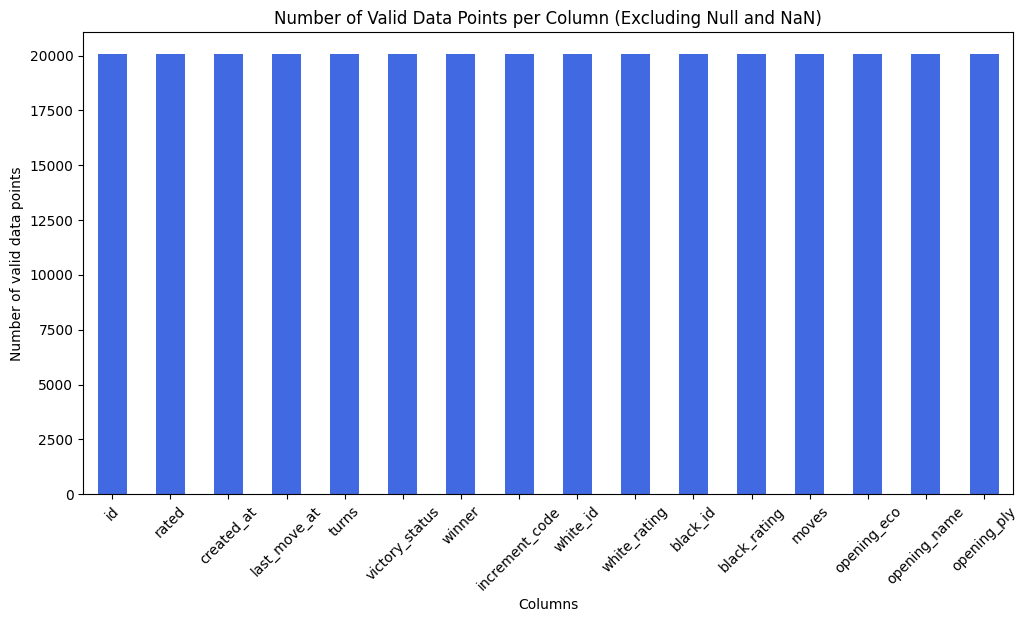

In [87]:
valid_data_counts = df.notna().sum()

plt.figure(figsize=(12,6))
valid_data_counts.plot(kind='bar', color="royalblue")
plt.xlabel("Columns")
plt.ylabel("Number of valid data points")
plt.title("Number of Valid Data Points per Column (Excluding Null and NaN)")
plt.xticks(rotation=45)
plt.show()

Our dataset is complete! That means that we do not need to deal with null or NaN cells.

### How big is our dataset?

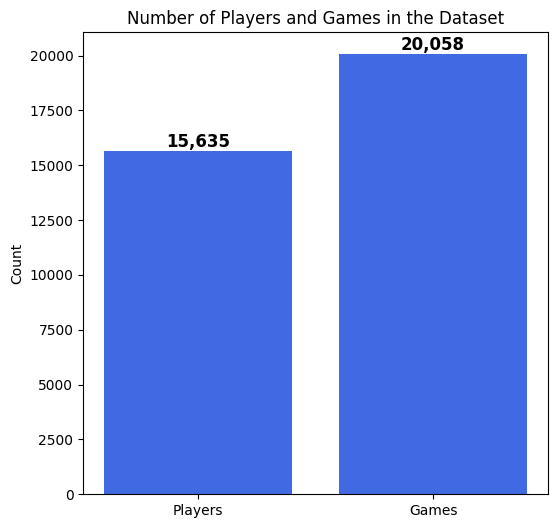

In [75]:
unique_players = pd.concat([df['white_id'], df['black_id']]).nunique()
nb_games = df.shape[0]

categories = ["Players", "Games"]
values = [unique_players, nb_games]
plt.figure(figsize=(6,6))
bars = plt.bar(categories, values, color="royalblue")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylabel("Count")
plt.title("Number of Players and Games in the Dataset")
plt.show()

### How many games has each player played?

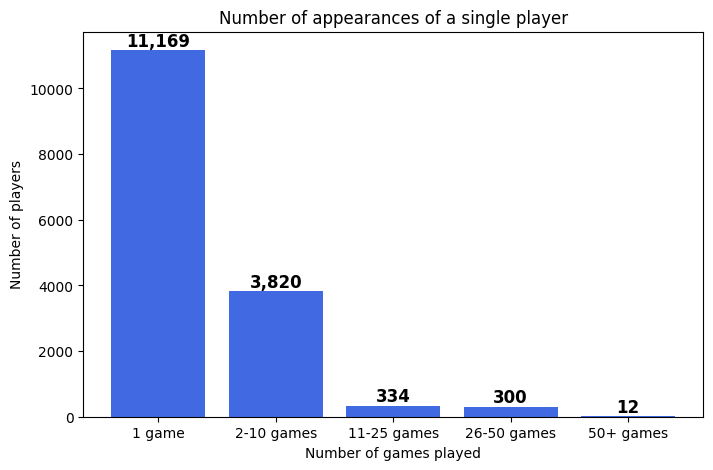

In [76]:
player_counts = pd.concat([df['white_id'], df['black_id']]).value_counts()
bins = [1, 2, 11, 26, 51, float("inf")]
labels = ["1 game", "2-10 games", "11-25 games", "26-50 games", "50+ games"]


player_categories = pd.cut(player_counts, bins=bins, labels=labels, right=False)
category_counts = player_categories.value_counts().reindex(labels)


plt.figure(figsize=(8,5))
bars = plt.bar(category_counts.index, category_counts.values, color="royalblue")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Number of games played")
plt.ylabel("Number of players")
plt.title("Number of appearances of a single player")
plt.show()

### Games' outcomes

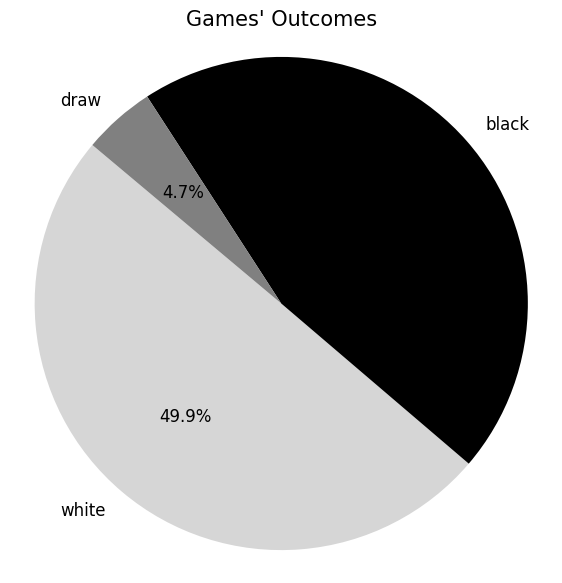

In [ ]:
winner_counts = df['winner'].value_counts()
colors = ["#D6D6D6", "black", "grey"]

plt.figure(figsize=(7, 7))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 12})
plt.title("Games' Outcomes", fontsize=15)
plt.axis('equal') 
plt.show()

### Distribution of Elo ratings

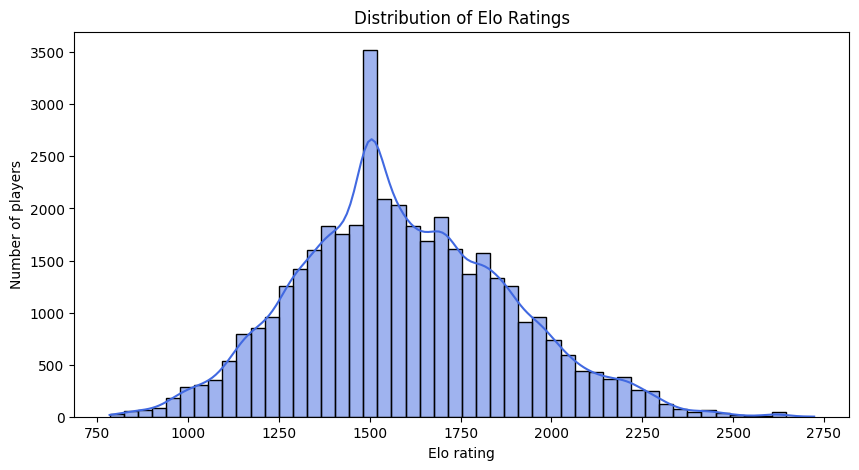

In [78]:
# Distribution of Elo ratings

all_ratings = pd.concat([df['white_rating'], df['black_rating']], axis=0)

plt.figure(figsize=(10,5))
sns.histplot(all_ratings, bins=50, kde=True, color="royalblue")
plt.xlabel("Elo rating")
plt.ylabel("Number of players")
plt.title("Distribution of Elo Ratings")
plt.show()

### Do higher-rated players win more?

In [91]:
higher_rated_wins = df[((df['white_rating'] > df['black_rating']) &(df['winner'] == 'white')) |
                       ((df['black_rating'] >df['white_rating']) & (df['winner'] == 'black'))]
percentage_higher_rated_wins = len(higher_rated_wins) / len(df) * 100

print(f"The higher-rated player wins {percentage_higher_rated_wins:.2f}% of the time.")

The higher-rated player wins 61.58% of the time.


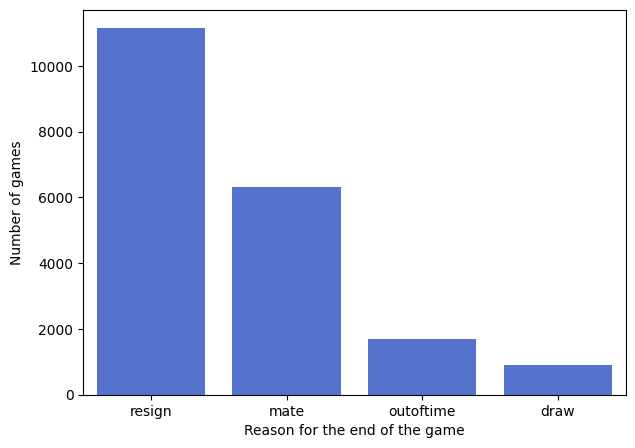

In [97]:
# Distribution of games' outcomes
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='victory_status',order=df['victory_status'].value_counts().index, color="royalblue")
plt.xlabel("Reason for the end of the game")
plt.ylabel("Number of games")
plt.show()

### How do players start their games?

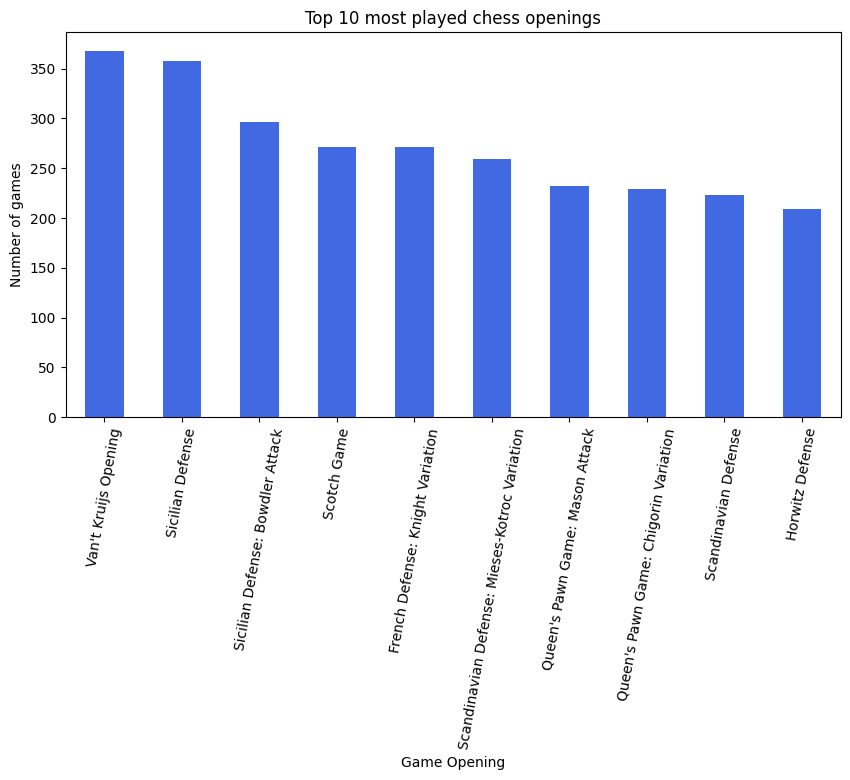

In [100]:
# Most popular openings
plt.figure(figsize=(10,5))
df['opening_name'].value_counts().nlargest(10).plot(kind='bar', color="royalblue")
plt.xlabel("Game Opening")
plt.ylabel("Number of games")
plt.title("Top 10 most played chess openings")
plt.xticks(rotation=80)
plt.show()

### Concerns about games' durations

In [ ]:
# Let's see how many games have the same start and end time.

df['unvalid_time'] = (df['created_at'] == df['last_move_at'])
nb_unvalid_time = df['unvalid_time'].sum()

print('There are ', nb_unvalid_time, 'parties for which the creation time is the same as the last move.')


There are  8548 parties for which the creation time is the same as the last move.


In [82]:
# The duration of each party is not a consistent enough data, so we drop this information

df = df.drop(columns=['created_at', 'last_move_at'])

We realized that nearly half of the games had the same start and end time. Furthermore, remaining games had strange durations that led us to drop these columns out of our dataset.